In [4]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
from MDAnalysis import *
from MDAnalysis.analysis.align import *
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis.rms import RMSF


In [7]:
import MDAnalysis
u = MDAnalysis.Universe('41w_ff.psf','50_frame.dcd')
ref = MDAnalysis.Universe(PSF,DCD)     # reference closed AdK (1AKE) (with the default ref_frame=0)
#ref = MDAnalysis.Universe(PSF,CRD)    # reference open AdK (4AKE)

import MDAnalysis.analysis.rms

R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
                            "backbone and resid 122-159",                                   # LID
                            "backbone and resid 30-59"],                                    # NMP
           filename="rmsd_all_CORE_LID_NMP.dat")
R.run()
R.save()

import matplotlib.pyplot as plt
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'k--', label="CORE")
ax.plot(time, rmsd[4], 'r--', label="LID")
ax.plot(time, rmsd[5], 'b--', label="NMP")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

IOError: Failed to load from the topology file 41w_ff.psf with parser <class 'MDAnalysis.topology.PSFParser.PSFParser'>.
Error: [Errno 5] Cannot open file or stream in mode='r'.: "'41w_ff.psf'"

In [8]:
import MDAnalysis
u = MDAnalysis.Universe('41wl_ff.psf','50_frame.dcd')
pdb = "./41wl_ff.pdb"
#ref1 = u.trajectory.
ref = MDAnalysis.Universe('41wl_ff.psf','50_frame.dcd')      # reference closed AdK (1AKE) (with the default ref_frame=0)
#mobile = Universe(PSF,DCD)
rmsd(u.atoms.CA.positions, ref.atoms.CA.positions)


3.92068124672431e-07

[[  0.00000000e+00   7.39290746e-07]
 [  1.00000000e+00   9.58260036e-01]
 [  2.00000000e+00   1.09913685e+00]
 [  3.00000000e+00   1.58017235e+00]
 [  4.00000000e+00   1.51524851e+00]
 [  5.00000000e+00   1.25831531e+00]
 [  6.00000000e+00   1.29666037e+00]
 [  7.00000000e+00   1.97707413e+00]
 [  8.00000000e+00   1.48582216e+00]
 [  9.00000000e+00   1.11138835e+00]
 [  1.00000000e+01   1.17093276e+00]
 [  1.10000000e+01   1.38943144e+00]
 [  1.20000000e+01   1.15222040e+00]
 [  1.30000000e+01   8.73565132e-01]
 [  1.40000000e+01   8.13977643e-01]
 [  1.50000000e+01   1.05710964e+00]
 [  1.60000000e+01   9.79789427e-01]
 [  1.70000000e+01   9.99653299e-01]
 [  1.80000000e+01   1.25344055e+00]
 [  1.90000000e+01   1.42301562e+00]
 [  2.00000000e+01   1.56294861e+00]
 [  2.10000000e+01   1.16561071e+00]
 [  2.20000000e+01   1.40184954e+00]
 [  2.30000000e+01   1.42863442e+00]
 [  2.40000000e+01   1.09930849e+00]
 [  2.50000000e+01   1.18829050e+00]
 [  2.60000000e+01   1.37952810e+00]
 

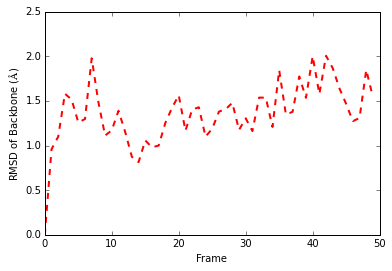

In [25]:
import numpy as np
RMSD = []
backbone = u.select_atoms("protein and (name C or name N or name CA)")
reference = ref.select_atoms("protein and (name C or name N or name CA)")
for ts in u.trajectory:
    A = backbone.coordinates()
    B = reference.coordinates()
    C = rmsd(A,B)
    RMSD.append((u.trajectory.frame, C))
RMSD = np.array(RMSD)
print RMSD
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(RMSD[:,0], RMSD[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("Frame")
ax.set_ylabel(r"RMSD of Backbone ($\AA$)")
ax.figure.savefig("RMSD.pdf")
plt.draw()

In [18]:
len(u.trajectory)

50

[[  0.          14.45947817]
 [  1.          14.56343943]
 [  2.          14.66004709]
 [  3.          14.5950319 ]
 [  4.          14.65924899]
 [  5.          14.52109577]
 [  6.          14.52496548]
 [  7.          14.74254526]
 [  8.          14.74876355]
 [  9.          14.52289098]
 [ 10.          14.52560928]
 [ 11.          14.4352187 ]
 [ 12.          14.53671809]
 [ 13.          14.43235824]
 [ 14.          14.46688002]
 [ 15.          14.4705191 ]
 [ 16.          14.41274683]
 [ 17.          14.43789711]
 [ 18.          14.38424011]
 [ 19.          14.41613229]
 [ 20.          14.56441881]
 [ 21.          14.5337207 ]
 [ 22.          14.41597997]
 [ 23.          14.40583184]
 [ 24.          14.45525257]
 [ 25.          14.46460474]
 [ 26.          14.46638457]
 [ 27.          14.40691409]
 [ 28.          14.52930841]
 [ 29.          14.54878399]
 [ 30.          14.48549566]
 [ 31.          14.49806385]
 [ 32.          14.50785088]
 [ 33.          14.50795497]
 [ 34.        

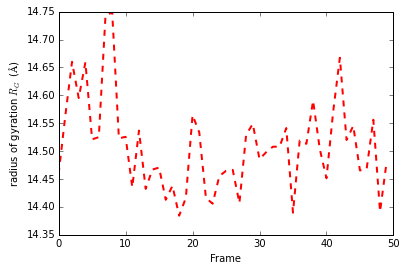

In [47]:
Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.frame, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

print Rgyr
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("Frame")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()

[[  0.00000000e+00   5.34164461e-07]
 [  1.00000000e+00   1.54629927e+00]
 [  2.00000000e+00   1.44347196e+00]
 [  3.00000000e+00   1.99289379e+00]
 [  4.00000000e+00   1.85068733e+00]
 [  5.00000000e+00   1.61465330e+00]
 [  6.00000000e+00   1.78023370e+00]
 [  7.00000000e+00   2.39800013e+00]
 [  8.00000000e+00   1.89272947e+00]
 [  9.00000000e+00   1.60691848e+00]
 [  1.00000000e+01   1.63336449e+00]
 [  1.10000000e+01   1.84776551e+00]
 [  1.20000000e+01   1.65945259e+00]
 [  1.30000000e+01   1.31706803e+00]
 [  1.40000000e+01   1.37257246e+00]
 [  1.50000000e+01   1.58766973e+00]
 [  1.60000000e+01   1.58488312e+00]
 [  1.70000000e+01   1.55337912e+00]
 [  1.80000000e+01   1.70441613e+00]
 [  1.90000000e+01   1.91122359e+00]
 [  2.00000000e+01   1.99538288e+00]
 [  2.10000000e+01   1.73095818e+00]
 [  2.20000000e+01   1.89093259e+00]
 [  2.30000000e+01   1.86865425e+00]
 [  2.40000000e+01   1.68523931e+00]
 [  2.50000000e+01   1.65180549e+00]
 [  2.60000000e+01   1.87369042e+00]
 

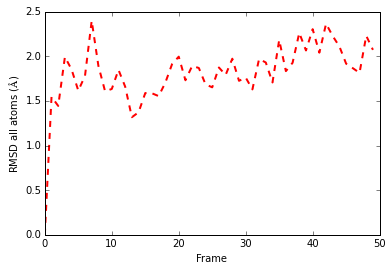

In [26]:
import numpy as np
RMSD_aa = []
current = u.select_atoms("protein and not name H*")
reference = ref.select_atoms("protein and not name H*")
for ts in u.trajectory:
    A = current.coordinates()
    B = reference.coordinates()
    C = rmsd(A,B)
    RMSD_aa.append((u.trajectory.frame, C))
RMSD_aa = np.array(RMSD_aa)
print RMSD_aa
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(RMSD_aa[:,0], RMSD_aa[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("Frame")
ax.set_ylabel(r"RMSD all atoms ($\AA$)")
ax.figure.savefig("RMSD_all_atoms.pdf")
plt.draw()

[[  0.00000000e+00   1.08735602e-06]
 [  1.00000000e+00   3.68662714e+00]
 [  2.00000000e+00   2.12019302e+00]
 [  3.00000000e+00   1.60456652e+00]
 [  4.00000000e+00   1.57198797e+00]
 [  5.00000000e+00   2.84287226e+00]
 [  6.00000000e+00   4.90751869e+00]
 [  7.00000000e+00   3.36932707e+00]
 [  8.00000000e+00   3.23793130e+00]
 [  9.00000000e+00   2.81030673e+00]
 [  1.00000000e+01   2.96390197e+00]
 [  1.10000000e+01   1.80263100e+00]
 [  1.20000000e+01   1.57591836e+00]
 [  1.30000000e+01   2.64336319e+00]
 [  1.40000000e+01   2.64373063e+00]
 [  1.50000000e+01   3.43870722e+00]
 [  1.60000000e+01   3.09839813e+00]
 [  1.70000000e+01   3.24417248e+00]
 [  1.80000000e+01   2.66968311e+00]
 [  1.90000000e+01   3.73360857e+00]
 [  2.00000000e+01   1.95119562e+00]
 [  2.10000000e+01   3.17663864e+00]
 [  2.20000000e+01   3.87500922e+00]
 [  2.30000000e+01   2.48765420e+00]
 [  2.40000000e+01   2.36807138e+00]
 [  2.50000000e+01   2.67178418e+00]
 [  2.60000000e+01   3.63333534e+00]
 

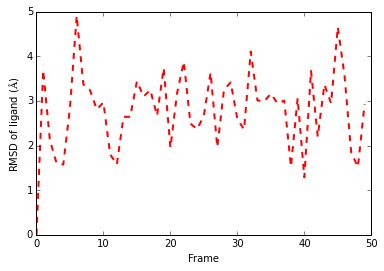

In [28]:
import numpy as np
RMSD_lig = []
ligand = u.select_atoms("(resid 142:146) and not name H*") ## include selection based on user description
#current = u.select_atoms("segname BGLC and not name H*")
reference = ref.select_atoms("(resid 142:146) and not name H*")
for ts in u.trajectory:
    A = ligand.coordinates()
    B = reference.coordinates()
    C = rmsd(A,B)
    RMSD_lig.append((u.trajectory.frame, C))
RMSD_lig = np.array(RMSD_lig)
print RMSD_lig
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(RMSD_lig[:,0], RMSD_lig[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("Frame")
ax.set_ylabel(r"RMSD of ligand ($\AA$)")
ax.figure.savefig("RMSD_ligand.pdf")
plt.draw()

#RMSF

In [29]:
mdanalysis.analysis?

Object `mdanalysis.analysis` not found.


In [49]:
MDAnalysis.analysis.rms.RMSF?

TypeError: list indices must be integers, not tuple

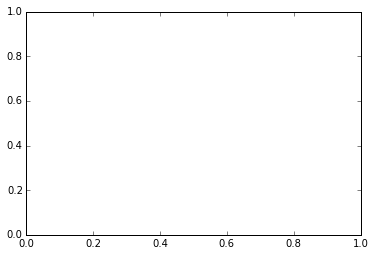

In [106]:
import numpy as np
RMSF_bb = []
backbone = u.select_atoms("protein and (name CA)")
C = MDAnalysis.analysis.rms.RMSF(backbone)
C.run()
C.rmsf[:]
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(RMSF_bb[:,0], C.rmsf[:,0], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("Frame")
ax.set_ylabel(r"RMSF of Backbone ($\AA$)")
ax.figure.savefig("RMSF.pdf")
plt.draw()

In [72]:
C.rmsf.shape

(426,)